In [48]:
from keras.models import Sequential, load_model
from keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

In [49]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

(60000, 28, 28) (60000,)


(60000, 10)

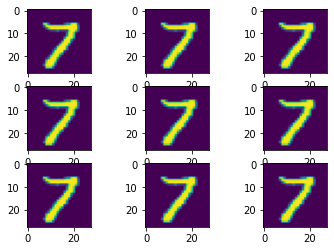

In [61]:
# Load Data
(x_train,y_train),(x_test, y_test) = mnist.load_data()
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_test[i])
print(x_train.shape, y_train.shape)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train.shape

In [43]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_51 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_53 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

In [44]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 50, batch_size = 64, validation_split = 0.2)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


750/750 [==============================] - 7s 8ms/step - loss: 0.1331 - acc: 0.9586 - val_loss: 0.0879 - val_acc: 0.9726
Epoch 2/50
750/750 [==============================] - 6s 8ms/step - loss: 0.0411 - acc: 0.9872 - val_loss: 0.0481 - val_acc: 0.9851
Epoch 3/50
750/750 [==============================] - 6s 8ms/step - loss: 0.0290 - acc: 0.9909 - val_loss: 0.0311 - val_acc: 0.9903
Epoch 4/50
750/750 [==============================] - 6s 8ms/step - loss: 0.0238 - acc: 0.9925 - val_loss: 0.0400 - val_acc: 0.9883
Epoch 5/50
750/750 [==============================] - 6s 8ms/step - loss: 0.0208 - acc: 0.9930 - val_loss: 0.0410 - val_acc: 0.9880
Epoch 6/50
750/750 [==============================] - 6s 8ms/step - loss: 0.0159 - acc: 0.9950 - val_loss: 0.0401 - val_acc: 0.9903
Epoch 7/50
750/750 [==============================] - 6s 8ms/step - loss: 0.0165 - acc: 0.9948 - val_loss: 0.0294 - val_acc: 0.9923
Epoch 8/50
750/750 [==============================] - 6s 8ms/step - loss: 0.0127 - acc:

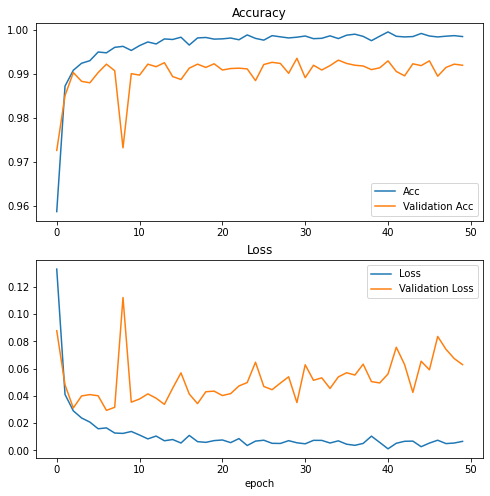

In [45]:
plot_history(his)

In [71]:
a = int(input('Random phan tu muon test:'))
print('Model nhan dang ra= ')
print(np.argmax(model.predict(x_test),axis=1)[a])


Random phan tu muon test:222
Model nhan dang ra= 
2


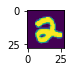

In [72]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()
for i in range(1):
  plt.subplot(330+a+1)
  plt.imshow(x_test[a])